In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
df = pd.read_csv('individuals-using-the-internet.csv')

In [30]:
df = df.drop(columns=[
    'seriesID',
    'seriesCode',
    'seriesName',
    'seriesParent',
    'seriesUnits',
    'entityID',
    'entityIso',
    'dataNote',
    'dataSource',
    'seriesDescription'
])

In [31]:
df = df.rename(columns={
    'entityName': 'Country',
    'dataValue': 'Value',
    'dataYear': 'Year'
})

In [32]:
df.isna().sum()

Country    0
Value      0
Year       0
dtype: int64

In [33]:
df.dtypes

Country     object
Value      float64
Year         int64
dtype: object

In [34]:
temp_df = df.copy()
years = range(2000, 2023)
brazil_ranks = {}

for i in years:
    sought_index = temp_df.query(f'Year == {i}').reset_index(drop=True).reset_index(drop=True)
    sought_index = sought_index.sort_values(by='Value', ascending=False).reset_index(drop=True)
    sought_index = sought_index.query('Country=="Brazil"')
    brazil_ranks[i] = sought_index.index[0]

In [35]:
new_index = range(len(brazil_ranks.keys()))
keys = pd.Series(tuple(brazil_ranks.keys()), new_index)
values = pd.Series(tuple(brazil_ranks.values()), new_index)

brazil_ranks = pd.concat([keys, values], axis=1).rename(columns={0: 'Year', 1: 'Rank'})

<module 'matplotlib.pyplot' from 'c:\\Users\\lazar\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

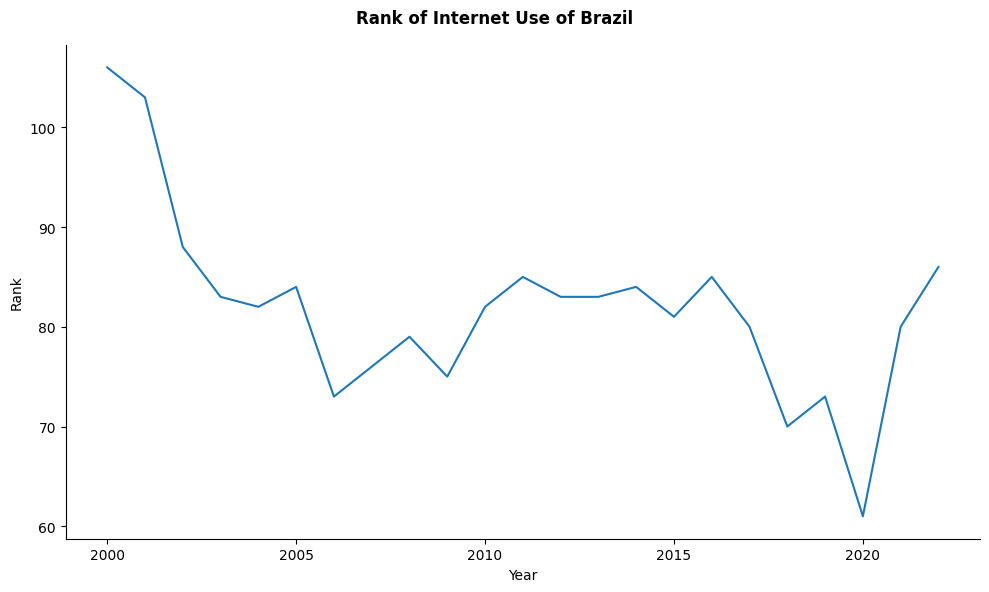

In [36]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=brazil_ranks, x='Year', y='Rank')

plt.suptitle('Rank of Internet Use of Brazil', fontweight='bold')
sns.despine()
plt.tight_layout()
plt